<a href="https://colab.research.google.com/github/Marzban-io/refinery-instrument-thresholds/blob/main/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

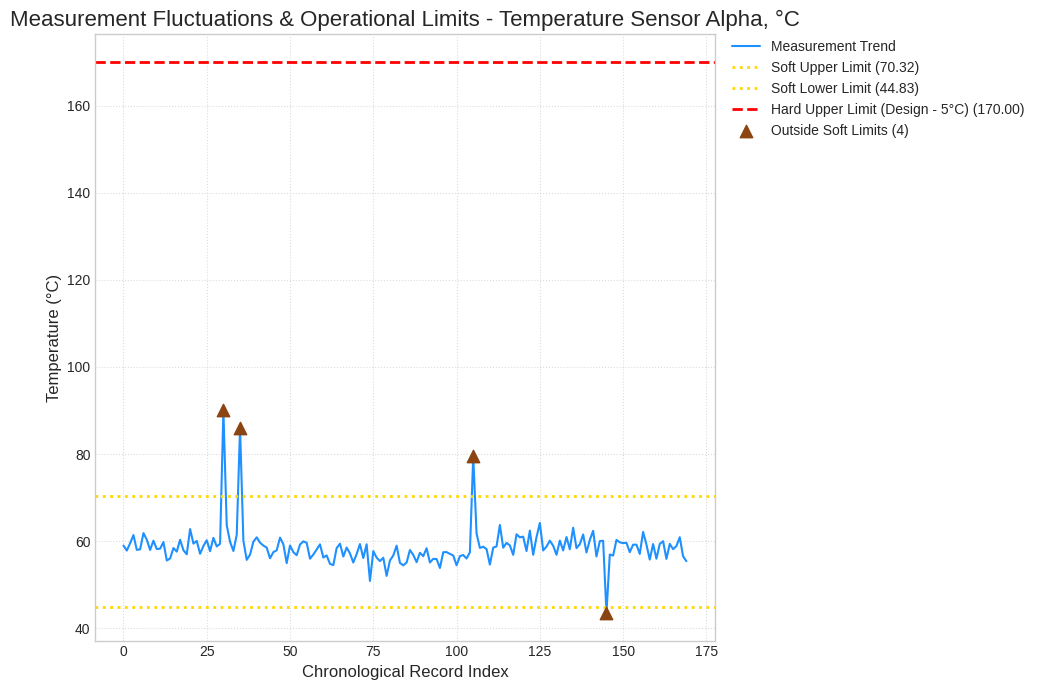

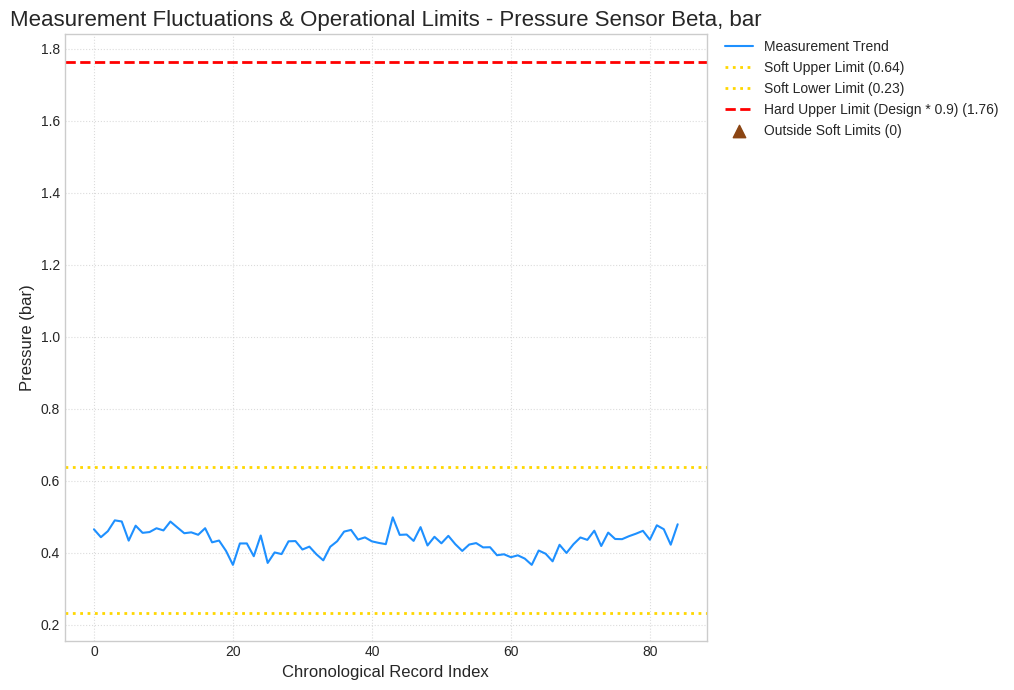


--- General Statistical Overview (Console) ---
                                Temperature Sensor Alpha, °C Pressure Sensor Beta, bar
Device Name                         Temperature Sensor Alpha      Pressure Sensor Beta
Total Measurements                                       170                        85
Min Value                                              43.50                      0.37
Max Value                                              90.00                      0.50
Mean                                                   58.65                      0.43
Median                                                 58.33                      0.43
Standard Deviation                                      4.36                      0.03
Variance                                               18.97                      0.00
Range                                                  46.50                      0.13
Q1 (25th perc.)                                        56.79                      

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ---------------------------------------------------------------------------
# 0. GENERIC DEVICE NAMES (Replace with your desired generic names)
# ---------------------------------------------------------------------------
generic_device_name_temp = "Temperature Sensor Alpha"
generic_tag_temp_unit = f"{generic_device_name_temp}, °C"

generic_device_name_pressure = "Pressure Sensor Beta"
generic_tag_pressure_unit = f"{generic_device_name_pressure}, bar"

# ---------------------------------------------------------------------------
# 1. DUMMY DATA GENERATION (Replace this with your actual data loading)
# ---------------------------------------------------------------------------
# Simulate data similar to your examples

# --- Temperature Data ---
np.random.seed(42)
num_points_temp = 170
record_index_temp = np.arange(num_points_temp)
temp_base = 58 + 2 * np.sin(np.linspace(0, 10, num_points_temp))
temp_noise = np.random.normal(0, 2, num_points_temp)
temp_data = temp_base + temp_noise
# Introduce some anomalies for the plot
temp_data[30] = 90
temp_data[35] = 86
temp_data[105] = 79.5
temp_data[145] = 43.5 # This will be outside lower soft limit, but also an anomaly

# Temperature Stats (approximating your console output)
temp_total_measurements = len(temp_data)
temp_min_value = np.min(temp_data) # Will be ~43.3 if seed works
temp_max_value = np.max(temp_data) # Will be ~90.0
temp_mean = np.mean(temp_data)
temp_median = np.median(temp_data)
temp_std_dev = np.std(temp_data)
temp_variance = np.var(temp_data)
temp_range = temp_max_value - temp_min_value
temp_q1 = np.percentile(temp_data, 25) # K1
temp_q3 = np.percentile(temp_data, 75) # K3
temp_iqr = temp_q3 - temp_q1          # IKA

temp_design_value = 175.00
temp_operating_process = 55.00
temp_soft_lower_limit = temp_q1 - 4.5 * temp_iqr # Approximation from your values: 44.83
temp_soft_upper_limit = temp_q3 + 4.5 * temp_iqr # Approximation: 70.32
# Adjust dummy limits to make anomalies visible as in your plot
temp_soft_lower_limit_plot = 44.83 # From your image
temp_soft_upper_limit_plot = 70.32 # From your image

temp_hard_upper_limit_design_offset = temp_design_value - 5.0 # e.g., Ontwerp - 5°C
temp_anomalies_soft = np.sum((temp_data > temp_soft_upper_limit_plot) | (temp_data < temp_soft_lower_limit_plot))
temp_anomalies_hard = np.sum(temp_data > temp_hard_upper_limit_design_offset) # Assuming no hard lower limit defined here for simplicity

# --- Pressure Data ---
np.random.seed(0)
num_points_pressure = 85
record_index_pressure = np.arange(num_points_pressure)
pressure_base = 0.43 + 0.03 * np.sin(np.linspace(0, 15, num_points_pressure))
pressure_noise = np.random.normal(0, 0.02, num_points_pressure)
pressure_data = np.clip(pressure_base + pressure_noise, 0.3, 0.55) # Clip to resemble your data range

# Pressure Stats (approximating your console output)
pressure_total_measurements = len(pressure_data)
pressure_min_value = np.min(pressure_data) # Approx 0.33
pressure_max_value = np.max(pressure_data) # Approx 0.50
pressure_mean = np.mean(pressure_data)
pressure_median = np.median(pressure_data)
pressure_std_dev = np.std(pressure_data)
pressure_variance = np.var(pressure_data)
pressure_range = pressure_max_value - pressure_min_value
pressure_q1 = np.percentile(pressure_data, 25) # K1
pressure_q3 = np.percentile(pressure_data, 75) # K3
pressure_iqr = pressure_q3 - pressure_q1        # IKA

pressure_design_value = 1.96
pressure_operating_process = 0.50
pressure_soft_lower_limit = pressure_q1 - 4.5 * pressure_iqr # Approx 0.23
pressure_soft_upper_limit = pressure_q3 + 4.5 * pressure_iqr # Approx 0.63
pressure_hard_upper_limit_design_factor = pressure_design_value * 0.9 # e.g., Ontwerp * 0.9
pressure_anomalies_soft = np.sum((pressure_data > pressure_soft_upper_limit) | (pressure_data < pressure_soft_lower_limit))
pressure_anomalies_hard = np.sum(pressure_data > pressure_hard_upper_limit_design_factor)

# ---------------------------------------------------------------------------
# 2. PLOTTING FUNCTIONS
# ---------------------------------------------------------------------------

def plot_instrument_data(record_index, data, device_name_with_unit, y_label,
                         soft_upper_limit, soft_lower_limit,
                         hard_upper_limit, hard_upper_limit_label_suffix,
                         show_hard_lower_limit=False, hard_lower_limit=None, hard_lower_limit_label_suffix=None):
    plt.figure(figsize=(12, 7))
    plt.style.use('seaborn-v0_8-whitegrid') # Using a seaborn style for better visuals

    # Main measurement trend
    plt.plot(record_index, data, label="Measurement Trend", color="dodgerblue", linewidth=1.5)

    # Soft Limits
    plt.axhline(soft_upper_limit, color='gold', linestyle=':', linewidth=2, label=f"Soft Upper Limit ({soft_upper_limit:.2f})")
    plt.axhline(soft_lower_limit, color='gold', linestyle=':', linewidth=2, label=f"Soft Lower Limit ({soft_lower_limit:.2f})")

    # Hard Limits
    if hard_upper_limit is not None:
        plt.axhline(hard_upper_limit, color='red', linestyle='--', linewidth=2, label=f"Hard Upper Limit {hard_upper_limit_label_suffix} ({hard_upper_limit:.2f})")
    if show_hard_lower_limit and hard_lower_limit is not None:
         plt.axhline(hard_lower_limit, color='darkred', linestyle='--', linewidth=2, label=f"Hard Lower Limit {hard_lower_limit_label_suffix} ({hard_lower_limit:.2f})")


    # Points outside soft limits
    outside_soft_indices = np.where((data > soft_upper_limit) | (data < soft_lower_limit))[0]
    if len(outside_soft_indices) > 0:
        plt.scatter(record_index[outside_soft_indices], data[outside_soft_indices],
                    marker='^', color='saddlebrown', s=80, zorder=5,
                    label=f"Outside Soft Limits ({len(outside_soft_indices)})")
    else: # Add to legend even if none, to match your example structure
        plt.scatter([], [], marker='^', color='saddlebrown', s=80, label="Outside Soft Limits (0)")


    plt.title(f"Measurement Fluctuations & Operational Limits - {device_name_with_unit}", fontsize=16)
    plt.xlabel("Chronological Record Index", fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)
    plt.grid(True, linestyle=':', alpha=0.7)
    plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout to make space for legend
    plt.show()

# ---------------------------------------------------------------------------
# 3. GENERATE PLOTS
# ---------------------------------------------------------------------------

# --- Temperature Plot ---
plot_instrument_data(
    record_index=record_index_temp,
    data=temp_data,
    device_name_with_unit=generic_tag_temp_unit,
    y_label="Temperature (°C)",
    soft_upper_limit=temp_soft_upper_limit_plot, # Using the plot-specific ones for visual match
    soft_lower_limit=temp_soft_lower_limit_plot,
    hard_upper_limit=temp_hard_upper_limit_design_offset,
    hard_upper_limit_label_suffix="(Design - 5°C)" # Example: "(Design - Offset)"
)

# --- Pressure Plot ---
plot_instrument_data(
    record_index=record_index_pressure,
    data=pressure_data,
    device_name_with_unit=generic_tag_pressure_unit,
    y_label="Pressure (bar)",
    soft_upper_limit=pressure_soft_upper_limit,
    soft_lower_limit=pressure_soft_lower_limit,
    hard_upper_limit=pressure_hard_upper_limit_design_factor,
    hard_upper_limit_label_suffix="(Design * 0.9)" # Example: "(Design * Factor)"
)


# ---------------------------------------------------------------------------
# 4. STATISTICAL SUMMARY (Console Output)
# ---------------------------------------------------------------------------
print("\n--- General Statistical Overview (Console) ---")
print("=================================================================================================")

# Prepare data for the DataFrame
stats_data = {
    generic_tag_temp_unit: [
        generic_device_name_temp, # Apparaatnaam -> Device Name (value)
        temp_total_measurements,
        f"{temp_min_value:.2f}",
        f"{temp_max_value:.2f}",
        f"{temp_mean:.2f}",
        f"{temp_median:.2f}",
        f"{temp_std_dev:.2f}",
        f"{temp_variance:.2f}",
        f"{temp_range:.2f}",
        f"{temp_q1:.2f}",
        f"{temp_q3:.2f}",
        f"{temp_iqr:.2f}",
        f"{temp_design_value:.2f}",
        f"{temp_operating_process:.2f}",
        "NaN", # Druk Ontwerp
        "NaN", # Druk Bedrijf (proces)
        f"{temp_soft_lower_limit:.2f}",
        f"{temp_soft_upper_limit:.2f}",
        "NaN", # Harde Bovenlimiet (Ontwerp * 0.9)
        f"{temp_hard_upper_limit_design_offset:.2f}", # Harde Bovenlimiet (Ontwerp - 5°C)
        f"{temp_anomalies_soft:.0f}",
        f"{temp_anomalies_hard:.0f}"
    ],
    generic_tag_pressure_unit: [
        generic_device_name_pressure, # Apparaatnaam -> Device Name (value)
        pressure_total_measurements,
        f"{pressure_min_value:.2f}",
        f"{pressure_max_value:.2f}",
        f"{pressure_mean:.2f}",
        f"{pressure_median:.2f}",
        f"{pressure_std_dev:.2f}",
        f"{pressure_variance:.2f}",
        f"{pressure_range:.2f}",
        f"{pressure_q1:.2f}",
        f"{pressure_q3:.2f}",
        f"{pressure_iqr:.2f}",
        "NaN", # Temperatuur Ontwerp
        "NaN", # Temperatuur Bedrijf (proces)
        f"{pressure_design_value:.2f}",
        f"{pressure_operating_process:.2f}",
        f"{pressure_soft_lower_limit:.2f}",
        f"{pressure_soft_upper_limit:.2f}",
        f"{pressure_hard_upper_limit_design_factor:.2f}", # Harde Bovenlimiet (Ontwerp * 0.9)
        "NaN", # Harde Bovenlimiet (Ontwerp - 5°C)
        f"{pressure_anomalies_soft:.0f}",
        f"{pressure_anomalies_hard:.0f}"
    ]
}

stats_index_english = [
    "Device Name", # Apparaatnaam
    "Total Measurements", # Totaal Metingen
    "Min Value", # Min Waarde
    "Max Value", # Max Waarde
    "Mean", # Gemiddelde
    "Median", # Mediaan
    "Standard Deviation", # Standaardafwijking
    "Variance", # Variantie
    "Range", # Bereik
    "Q1 (25th perc.)", # K1 (25e perc.)
    "Q3 (75th perc.)", # K3 (75e perc.)
    "IQR", # IKA
    "Temperature Design", # Temperatuur Ontwerp
    "Temperature Operating (process)", # Temperatuur Bedrijf (proces)
    "Pressure Design", # Druk Ontwerp
    "Pressure Operating (process)", # Druk Bedrijf (proces)
    "Soft Lower Limit (Q1-4.5IQR)", # Zachte Onderlimiet (K1-4.5IKA)
    "Soft Upper Limit (Q3+4.5IQR)", # Zachte Bovenlimiet (K3+4.5IKA)
    "Hard Upper Limit (Design * 0.9)", # Harde Bovenlimiet (Ontwerp * 0.9) - For Pressure
    "Hard Upper Limit (Design - 5°C)", # Harde Bovenlimiet (Ontwerp - 5°C) - For Temp
    "Anomalies (vs. Soft)", # Anomalieën (vs. Zacht)
    "Anomalies (vs. Hard)"  # Anomalieën (vs. Hard)
]

df_stats = pd.DataFrame(stats_data, index=stats_index_english)

# To match your print format better (left-aligned index, right-aligned values)
# This is a bit manual for console pretty printing.
# For more robust table formatting, libraries like 'tabulate' are good.
print(df_stats.to_string(header=True, float_format="%.2f"))
print("=================================================================================================")